In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv("WitWorkers-dataset.csv")

In [5]:
df.head()

,Unnamed: 0,zipcode,Street_Connectivity,Transit_Proximity,Population,Highschool_Graduation_Rate,Rental_Houses_Units,Household_Income,Employment_Rate,actual_num
0,0,28012,1.300000,100.000000,2451,94.000000,307.0,22976.00000,82.00,9
1,1,28105,1.104615,41.076923,24465,96.416667,761.0,76486.23077,94.00,281
2,2,28126,1.120000,53.000000,10339,85.500000,575.0,53997.50000,90.75,2
3,3,28202,1.485000,100.000000,11144,90.000000,22.0,63866.00000,94.00,116
4,4,28203,1.420000,100.000000,14820,90.333333,757.0,77448.60000,96.20,45


In [6]:
df = df.iloc[:,1:]
df.head()

,zipcode,Street_Connectivity,Transit_Proximity,Population,Highschool_Graduation_Rate,Rental_Houses_Units,Household_Income,Employment_Rate,actual_num
0,28012,1.300000,100.000000,2451,94.000000,307.0,22976.00000,82.00,9
1,28105,1.104615,41.076923,24465,96.416667,761.0,76486.23077,94.00,281
2,28126,1.120000,53.000000,10339,85.500000,575.0,53997.50000,90.75,2
3,28202,1.485000,100.000000,11144,90.000000,22.0,63866.00000,94.00,116
4,28203,1.420000,100.000000,14820,90.333333,757.0,77448.60000,96.20,45


In [7]:
x = df.iloc[0:,1:-1]
x.head()

,Street_Connectivity,Transit_Proximity,Population,Highschool_Graduation_Rate,Rental_Houses_Units,Household_Income,Employment_Rate
0,1.300000,100.000000,2451,94.000000,307.0,22976.00000,82.00
1,1.104615,41.076923,24465,96.416667,761.0,76486.23077,94.00
2,1.120000,53.000000,10339,85.500000,575.0,53997.50000,90.75
3,1.485000,100.000000,11144,90.000000,22.0,63866.00000,94.00
4,1.420000,100.000000,14820,90.333333,757.0,77448.60000,96.20


In [8]:
y = df['actual_num']
y.head()

0      9
1    281
2      2
3    116
4     45
Name: actual_num, dtype: int64

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.10, random_state = 0)

In [10]:
y_test

2       2
24    674
14    937
Name: actual_num, dtype: int64

In [11]:
import numpy.ma as ma
X_train = np.where(np.isnan(X_train), ma.array(X_train, mask=np.isnan(X_train)).mean(axis=0), X_train)

X_test = np.where(np.isnan(X_test), ma.array(X_test, mask=np.isnan(X_test)).mean(axis=0), X_test)

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

In [13]:
X, y = make_regression(n_features=4, n_informative=2,
                       random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=2, random_state=0,
                             n_estimators=100)
regr.fit(X_train, y_train)







RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [14]:

print(regr.feature_importances_)



[0.05692098 0.02769927 0.08276141 0.13996408 0.16632712 0.43331471
 0.09301244]


In [15]:
print(regr.predict(X_test))

[ 409.57992638  647.09464474 1069.13582576]


In [16]:
y_pred = regr.predict(X_test)

In [ ]:
# pvalue stat:


In [17]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


In [18]:
lm = linear_model.ElasticNet()

lm.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [19]:
print (lm.score(X_train, y_train))


0.6988073883354353


In [20]:
c = sm.add_constant(x)
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             actual_num   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.873
Method:                 Least Squares   F-statistic:                     24.61
Date:                Sat, 23 Mar 2019   Prob (F-statistic):           1.04e-07
Time:                        07:36:57   Log-Likelihood:                -164.58
No. Observations:                  24   AIC:                             343.2
Df Residuals:                      17   BIC:                             351.4
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1         -2163.7797    766.315     -2.824      0.012   -3780.563    -546.997
x2             5.6368      3.312      1.702      0.107      -1.350      12.624
x3             0.0163      0.006      2.835      0.011       0.004       0.028
x4           -21.9936     10.610     -2.073      0.054     -44.379       0.392
x5            -0.0807      0.080     -1.008      0.328      -0.250       0.088
x6            -0.0236      0.004     -5.381      0.000      -0.033      -0.014
x7            62.9849     15.477      4.070      0.001      30.331      95.639
==============================================================================
Omnibus:                        0.829   Durbin-Watson:                   1.930
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.818
Skew:                           0.376   Prob(JB):                        0.664
Kurtosis:                       2.497   Cond. No.                     9.86e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.86e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
print(len(y_pred), len(y_test))

3 3


In [22]:
y_test

2       2
24    674
14    937
Name: actual_num, dtype: int64

In [23]:
# clusters 


In [24]:
from sklearn.cluster import KMeans


In [25]:

kmeans = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = kmeans.fit_predict(X_train)

In [26]:
y_kmeans

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1])

In [27]:
x = X_train

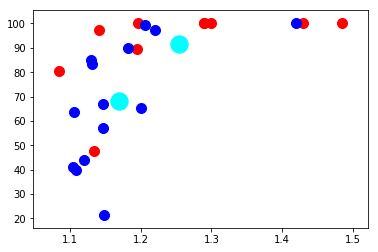

In [28]:
plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1], s = 100, c = 'red', label = 'cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1], s = 100, c = 'blue', label = 'cluster2')
'''
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1], s = 100, c = 'blue', label = 'cluster3')
plt.scatter(x[y_kmeans==3,0], x[y_kmeans==3,1], s = 100, c = 'green', label = 'cluster4')
plt.scatter(x[y_kmeans==4,0], x[y_kmeans==4,1], s = 100, c = 'black', label = 'cluster5')
'''
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s = 300, c = 'cyan',label = 'centroids')

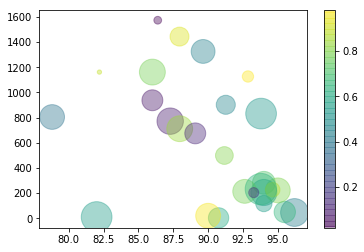

In [29]:
rng = np.random.RandomState(0)
x = df['Employment_Rate']
y = df['actual_num']
colors = rng.rand(27)
sizes = 1000 * rng.rand(27)
plt.scatter(x, y, c=colors, s=sizes, alpha=0.4,
cmap='viridis')
plt.colorbar(); # show color scale